In [2]:
!pip install mlbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.2 MB 1.2 MB/s 
     |████████████████████████████████| 26.1 MB 1.6 MB/s 
     |████████████████████████████████| 13.0 MB 30.0 MB/s 
     |████████████████████████████████| 1.9 MB 40.2 MB/s 
     |████████████████████████████████| 10.4 MB 5.0 MB/s 
     |████████████████████████████████| 294 kB 50.0 MB/s 
     |████████████████████████████████| 7.0 MB 24.3 MB/s 
     |████████████████████████████████| 86.3 MB 49 kB/s 
     |████████████████████████████████| 1.2 MB 47.3 MB/s 
     |████████████████████████████████| 4.3 MB 40.8 MB/s 
     |████████████████████████████████| 103 kB 71.4 MB/s 
     |████████████████████████████████| 1.7 MB 58.6 MB/s 
     |████████████████████████████████| 449 kB 56.4 MB/s 
     |████████████████████████████████| 3.8 MB 50.0 MB/s 
     |████████████████████████████████| 50 kB 7.2 MB/s 
  Created wheel for mlbox: filena

# importing the MLBox

In [1]:
from mlbox.preprocessing import *
from mlbox.optimisation import *
from mlbox.prediction import *

In [2]:
paths = ["train_classification.csv", "test_classification.csv"]
target_name = "Survived"

# reading and cleaning all files 

In [3]:
rd = Reader(sep = ',')
df = rd.train_test_split(paths, target_name)


reading csv : train_classification.csv ...
cleaning data ...
CPU time: 4.557932138442993 seconds

reading csv : test_classification.csv ...
cleaning data ...
CPU time: 0.07444190979003906 seconds

> Number of common features : 11

gathering and crunching for train and test datasets ...
reindexing for train and test datasets ...
dropping training duplicates ...
dropping constant variables on training set ...

> Number of categorical features: 5
> Number of numerical features: 6
> Number of training samples : 891
> Number of test samples : 418

> Top sparse features (% missing values on train set):
Cabin       77.1
Age         19.9
Embarked     0.2
dtype: float64

> Task : classification
0.0    549
1.0    342
Name: Survived, dtype: int64

encoding target ...


In [4]:
dft = Drift_thresholder()
df = dft.fit_transform(df)


computing drifts ...
CPU time: 0.24892020225524902 seconds

> Top 10 drifts

('PassengerId', 1.0)
('Name', 0.9884812957883793)
('Ticket', 0.686198220212376)
('Cabin', 0.18093677397642205)
('Embarked', 0.07844664795735223)
('Fare', 0.07199638237300032)
('Sex', 0.036428365995077705)
('Parch', 0.033885082122254495)
('Age', 0.029807645714597264)
('SibSp', 0.02087728298517133)

> Deleted variables : ['Name', 'PassengerId', 'Ticket']
> Drift coefficients dumped into directory : save


# tuning

In [5]:
opt = Optimiser(scoring = 'accuracy', n_folds = 3)

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:74: UserWarning: Optimiser will save all your fitted models into directory 'save/joblib'. Please clear it regularly.
  +str(self.to_path)+"/joblib'. Please clear it regularly.")


In [6]:
opt.evaluate(None, df)

No parameters set. Default configuration is tested

##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}


MEAN SCORE : accuracy = 0.8103254769921436
VARIANCE : 0.03534908136481175 (fold 1 = 0.7609427609427609, fold 2 = 0.8282828282828283, fold 3 = 0.8417508417508418)
CPU time: 0.865826129

0.8103254769921436

In [7]:
space = {
    
        'ne__numerical_strategy':{"search":"choice",
                                 "space":[0]},
        'ce__strategy':{"search":"choice",
                        "space":["label_encoding","random_projection", "entity_embedding"]}, 
        'fs__threshold':{"search":"uniform",
                        "space":[0.01,0.3]},    
        'est__max_depth':{"search":"choice",
                                  "space":[3,4,5,6,7]}
    
        }

best = opt.optimise(space, df,15)

##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'entity_embedding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.2624815369531619}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 6, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
MEAN SCORE : accuracy = 0.8136924803591471
VARIANCE : 0.04135920487696583 (fold 1 = 0.7609427609427609, fold 2 = 0.8181818181818182, fold 3 = 0.8619528619528619)
CPU time


fitting the pipeline ...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


CPU time: 0.3386223316192627 seconds


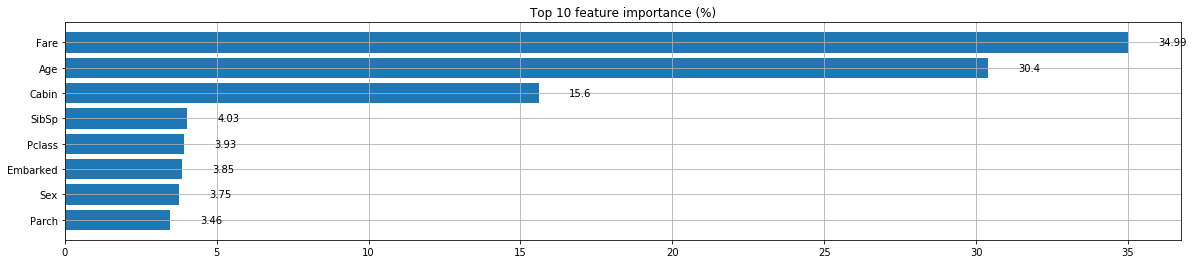


> Feature importances dumped into directory : save

predicting ...
CPU time: 0.027105093002319336 seconds

> Overview on predictions : 

        0.0       1.0  Survived_predicted
0  0.984049  0.015951                   0
1  0.957517  0.042483                   0
2  0.788414  0.211586                   0
3  0.799278  0.200722                   0
4  0.525908  0.474092                   0
5  0.828626  0.171374                   0
6  0.760687  0.239313                   0
7  0.955977  0.044023                   0
8  0.079744  0.920256                   1
9  0.983687  0.016313                   0

dumping predictions into directory : save ...


In [8]:
prd = Predictor()
prd.fit_predict(best, df)